In [64]:
#2D efk

In [85]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [86]:
def predict(xest,u,P):
    w=float(u[1])
    U=np.array([[DT*math.cos(xest[2,0]+w*0.5*DT),0],
                [DT*math.sin(xest[2,0]+w*0.5*DT),0],
                [0,DT]])
    xest=xest+U@u
    v=float(u[0])
    G=np.array([[1,0,-DT*(v)*math.sin(xest[2,0]+w*0.5*DT)],[0,1,DT*(v)*math.cos(xest[2,0]+w*0.5*DT)],[0,0,1]])
    P=G@P@(G.T)+Cx
    return xest,P

In [90]:
def measurement(x,m):
    mx=m[0]-x[0]
    my=m[1]-x[1]
    mt=math.atan2(my,mx)
    return mx,my,mt

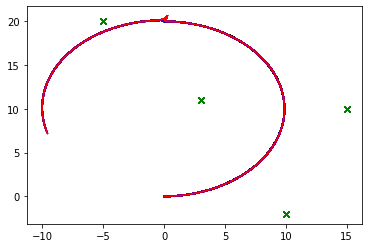

In [108]:
time=0.0
STATE_SIZE=3
DT=0.1
Cx=np.diag([0.5, 0.5, np.deg2rad(30.0)])**2
m=np.array([[10.0, -2.0],[15.0, 10.0],[3.0, 11.0],[-5.0, 20.0]])
P=np.zeros((STATE_SIZE,STATE_SIZE))
u=np.array([[1.],[0.1]])
xtrue=np.zeros((STATE_SIZE,1))
xest=np.zeros((STATE_SIZE,1))
hxtrue=xtrue
hxest=xest
while 50>=time:
    time+=DT
    n=math.floor(xest[2,0]/(2*math.pi))
    xest[2,0]-=(2*math.pi*n)
    xest,P=predict(xest,u,P)
    theta=xest[2,0]
    w=float(u[1])
    U=np.array([[DT*math.cos(theta+w*0.5*DT),0],
                [DT*math.sin(theta+w*0.5*DT),0],
                [0,DT]])
    xtrue=xtrue+U@u
    n=math.floor(xtrue[2,0]/(2*math.pi))
    xtrue[2,0]-=(2*math.pi*n)
    for i in range(len(m)):
        mx,my,mt=measurement(xest,m[i])
        tmx,tmy,tmt=measurement(xtrue,m[i])
        q=float(mx**2+my**2)
        zest=np.array([[float(q**0.5)],[mt-float(xest[2])],[0]])
        H=np.array([[float(-mx/(q**0.5)),float(-my/(q**0.5)),0],[float(my/q),float(-mx/q),-1],[0,0,0]])
        S=H@P@H.T+Cx
        K=P@H.T@(np.linalg.inv(S))
        z=np.array([[float((tmx**2+tmy**2)**0.5)],[tmt-float(xtrue[2])],[0]])
        xest=xest+K@(z-zest)
        P=(np.eye(STATE_SIZE)-K@H)@P
        plt.plot(m[i][0],m[i][1],"xg")
    hxtrue=np.hstack((hxtrue,xtrue))
    v=xest[0:STATE_SIZE]
    hxest = np.hstack((hxest, v))
    plt.plot(hxtrue[0, :], hxtrue[1, :], "-b")
    plt.plot(hxest[0, :], hxest[1, :], "-r")